### Описание данных 
* ad_id – идентификатор объявления (рекламы)
* xyz_campaign_id – идентификатор рекламной кампании в базе компании X
* fb_campaign_id – идентификатор кампании в Facebook
* age – возрастная группа, которой показывалась реклама
* gender – пол тех, кому показывалась реклама
* interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес, условно: 1 – животные, 2 – автомобили, 3 – тортики и т.д.)
* impressions – число показов
* clicks – число кликов
* spent – сумма, которую компания потратила на показ объявления 
* total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
* approved_conversion – количество людей, которые купили продукт после просмотра рекламы

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df= pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-b-dzhumaeva-37/stat/2/conversion.csv')

In [4]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


### 1. EDA, вычислить сколько уникальных рекламных кампаний было проведено

In [5]:
df.shape

(1143, 11)

In [6]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [7]:
df.xyz_campaign_id.value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

Было проведено 3 уникальных рекламных кампаний

### 2. Построим график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.

In [10]:
log = df.groupby('fb_campaign_id', as_index=False).sum()
log.head()

,fb_campaign_id,ad_id,xyz_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,103916,708746,916,15,7350,1,1.43,2,1
1,103917,708749,916,16,17861,2,1.82,2,0
2,103920,708771,916,20,693,0,0.00,1,0
3,103928,1417633,1832,56,8392,2,2.54,2,1
4,103929,708820,916,29,1915,0,0.00,1,1


In [11]:
log_t = np.log(log.Impressions)
log_t

0       8.902456
1       9.790375
2       6.541030
3       9.035034
4       7.557473
         ...    
686    13.937527
687    13.365386
688    11.928546
689    13.580108
690    13.148345
Name: Impressions, Length: 691, dtype: float64

In [12]:
import warnings
warnings.filterwarnings("ignore")

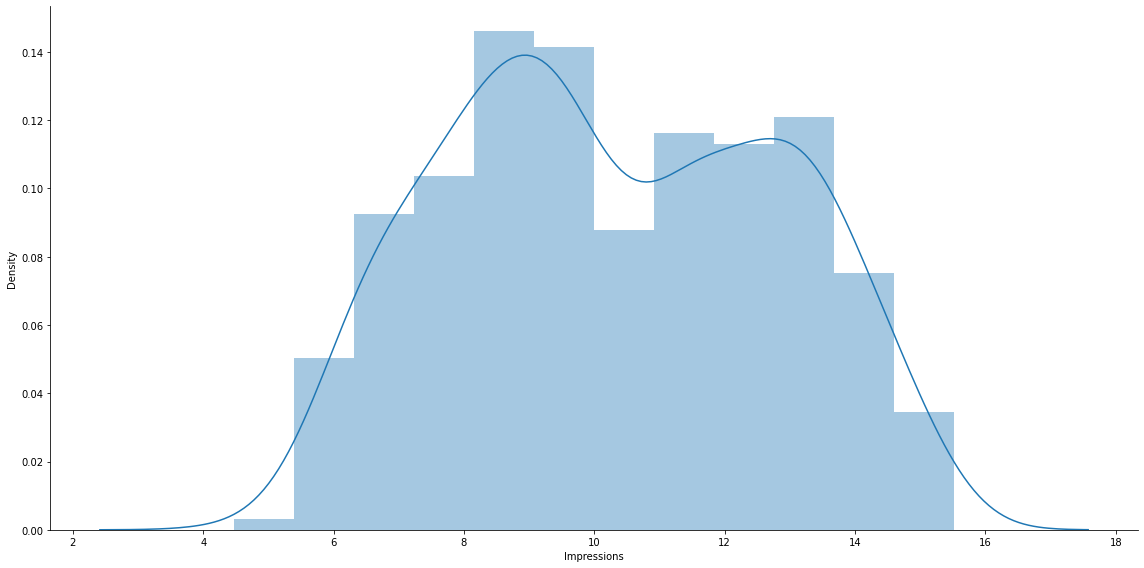

In [14]:
plt.figure(figsize=(16,8))
sns.distplot(log_t)
plt.tight_layout()
sns.despine()

Распределение бимодальное и не является нормальным

### 3. Посчитать CTR. Посмотреть на описательные статистики и распределение.

In [15]:
df['CTR'] = df.Clicks / df.Impressions
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


In [16]:
df.CTR.idxmax()

150

150 - наибольшее CTR. Найдем объявление с максимальным CTR

In [18]:
df.iloc[150]

ad_id                      738637
xyz_campaign_id               936
fb_campaign_id             109857
age                         45-49
gender                          F
interest                       24
Impressions                   944
Clicks                          1
Spent                        1.42
Total_Conversion                1
Approved_Conversion             0
CTR                    0.00105932
Name: 150, dtype: object

### 4. Проанализируем CTR с разбивкой по номеру рекламной кампании. Вычислить распределение CTR кампании 916

<AxesSubplot:xlabel='CTR'>

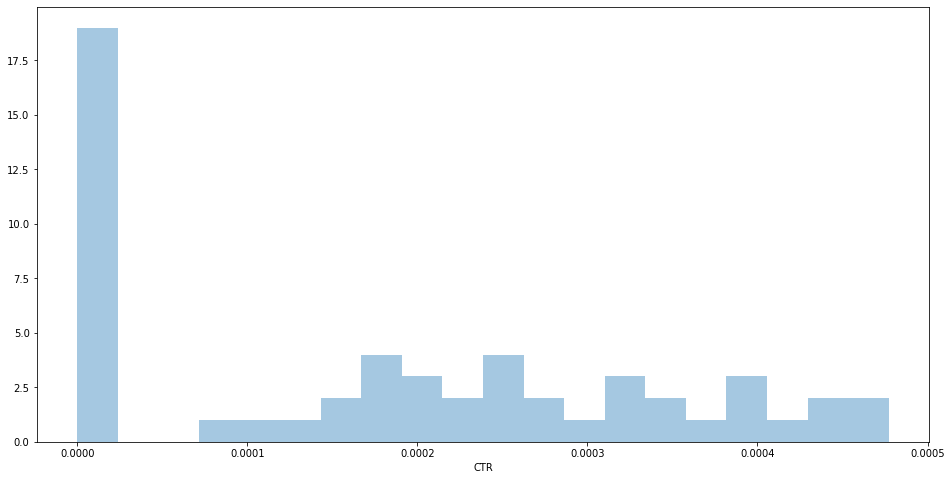

In [19]:
plt.figure(figsize=(16,8))
sns.distplot(df.query("xyz_campaign_id == '916'").CTR, kde = False, bins=20)

### 5. Посчитаем стоимость за клик пользователя по объявлению (CPC). Изучим полученные значения, используя меры центральной тенденции и меры изменчивости.

CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов.

In [20]:
df['CPC'] = df.Spent / df.Clicks

In [21]:
df.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

Так как в столбце встречаются NaN, при использовании функции iqr из scipy следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика необходимо использовать метод .dropna().

<AxesSubplot:xlabel='CPC', ylabel='Density'>

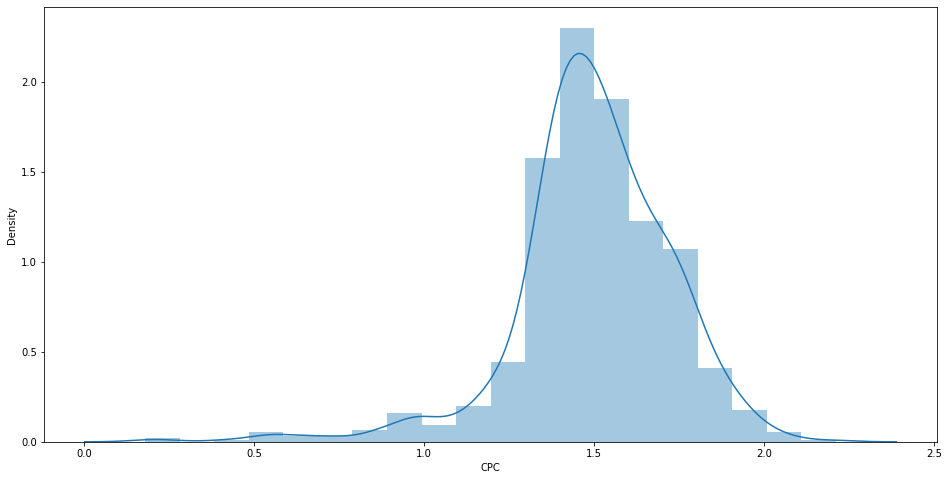

In [22]:
plt.figure(figsize=(16,8))
sns.distplot(df.CPC.dropna(), bins=20)

In [25]:
np.round(ss.iqr(df.CPC, nan_policy='omit'), 2) #межквартильный размах

0.25

Межквартильный размах CPC равняется 0.25

### 6. Визуализировать CPC с разбивкой по полу пользователей, которым были показаны объявления. 

<AxesSubplot:xlabel='CPC', ylabel='Density'>

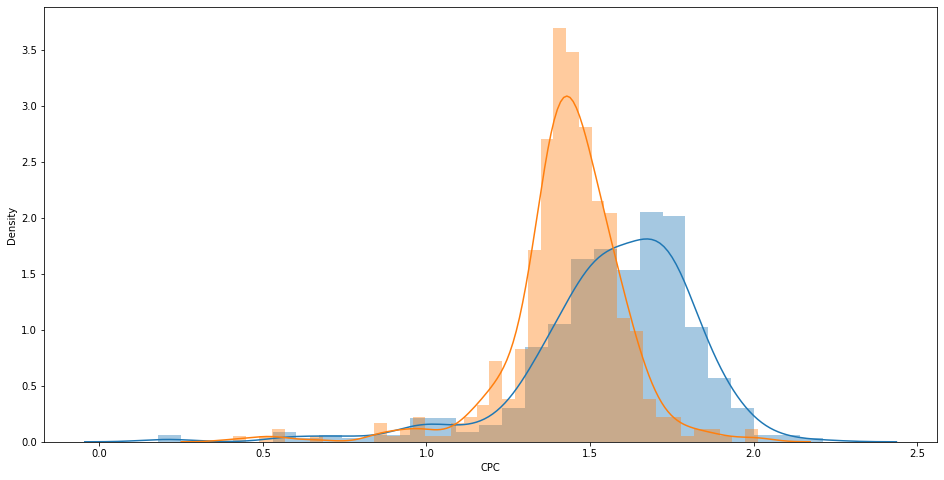

In [27]:
plt.figure(figsize=(16,8))
sns.distplot(df.query("gender == 'M'").CPC.dropna())
sns.distplot(df.query("gender == 'F'").CPC.dropna())

### 7. Посчитать конверсию из клика в покупку.

In [30]:
cr = df.groupby('ad_id', as_index=False).agg({'Clicks' : 'sum', 'Approved_Conversion' : 'sum'})
cr.head()

,ad_id,Clicks,Approved_Conversion
0,708746,1,1
1,708749,2,0
2,708771,0,0
3,708815,1,0
4,708818,1,1


In [31]:
df['CR'] = cr.Approved_Conversion / cr.Clicks * 100
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,100.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29,100.0


Посчитать конверсию для объявления 1121814 в процентах

In [33]:
np.round(df.query("ad_id == 1121814").CR, 2)

860    3.09
Name: CR, dtype: float64